In [20]:
import pandas as pd
import numpy as np
np.random.seed(0) #pour la reproductibilité

In [2]:
url_dataset = 'https://github.com/Ferdinand-Genans/SpotifyProject/blob/main/dataset.csv?raw=true'
df = pd.read_csv(url_dataset, index_col=0) #telechargement du dataset des musiques Spotify

In [3]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [4]:
#suppression des lignes avec données manquantes
df = df.dropna()

In [5]:
#Verification de la suppression
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [7]:
df.track_genre.nunique()

114

In [9]:
#Choix de 10 genres pour la classification
#Genre choisis car populaires et généralement avec parole 
genres = ['classical','country', 'house', 'metal', 'k-pop', 'jazz', 'rock', 'pop', 'r-n-b', 'reggae']
genres.sort()
print(genres)
print(len(genres))

['classical', 'country', 'house', 'jazz', 'k-pop', 'metal', 'pop', 'r-n-b', 'reggae', 'rock']
10


In [11]:
df = df.loc[df.track_genre.isin(genres)]
df  = df.reset_index() #pour que les indices partent de 0

In [13]:
#verificaton du nouveau data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             9999 non-null   int64  
 1   track_id          9999 non-null   object 
 2   artists           9999 non-null   object 
 3   album_name        9999 non-null   object 
 4   track_name        9999 non-null   object 
 5   popularity        9999 non-null   int64  
 6   duration_ms       9999 non-null   int64  
 7   explicit          9999 non-null   bool   
 8   danceability      9999 non-null   float64
 9   energy            9999 non-null   float64
 10  key               9999 non-null   int64  
 11  loudness          9999 non-null   float64
 12  mode              9999 non-null   int64  
 13  speechiness       9999 non-null   float64
 14  acousticness      9999 non-null   float64
 15  instrumentalness  9999 non-null   float64
 16  liveness          9999 non-null   float64


In [15]:
df['track_genre'].nunique()

10

In [ ]:
#Observation: Dataset equilibré, il n'y aura
#pas de problème de déséquilibre de données 
#à devoir prendre en compte pour l'éval de notre classif

In [16]:
cols = df.columns

In [18]:
cols

Index(['index', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [23]:
y = df['track_genre']
encoding_y = LabelEncoder()
y = encoding_y.fit_transform(y)
X = df.drop(['index','track_genre', 'track_id', 'artists', 'album_name', 'track_name'], axis = 1)

In [24]:

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [25]:
X.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,58,298266,False,0.643,0.268,11,-15.073,0,0.0900,0.593,0.000002,0.316,0.620,143.813,4
1,59,482586,False,0.484,0.898,0,-4.132,1,0.1640,0.365,0.000000,0.091,0.680,91.975,4
2,54,219437,False,0.608,0.638,11,-6.008,0,0.0292,0.581,0.017200,0.448,0.439,140.109,4
3,68,299146,False,0.695,0.293,11,-16.278,0,0.0431,0.596,0.015800,0.132,0.637,143.804,4
4,59,387716,False,0.583,0.308,7,-18.303,0,0.0465,0.581,0.010600,0.257,0.241,118.226,4


In [26]:
numerical_features= ['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']
categorical_features = ['time_signature', 'mode', 'explicit']

In [ ]:
#Preprocessing Pipeline

#Variables numériques:
#Aucune donnée manquante, pas de SimpleImputer
#Scaling des données par MinMaxScaler

#Variables categorielles: [time_signature, mode]
#Aucune donnée manquante, pas de SimpleImputer
#OneHotEncoder

In [27]:
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('catergorical', categorical_transformer, categorical_features)
    ]
)

In [ ]:
#Test de différents classifieurs sans modification de 
#paramètres pour séléctionner des classif candidats

In [28]:
from sklearn.metrics import accuracy_score

In [35]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from xgboost import XGBClassifier as XGB

In [ ]:
#Entrainement et analyse de classifieurs candidats 
#Sans modification de leurs paramètres de base

In [36]:
dict_classifiers = {
    "Logreg": LogisticRegression(solver='lbfgs'),
    "NN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GBC": GradientBoostingClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "AB": AdaBoostClassifier(),
    "XGB": XGB()
}

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [45]:
for name, model in dict_classifiers.items():
    print(name)

Logreg
NN
SVM
GBC
DT
RF
AB
XGB


Logreg : 0.46


/home/fg/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


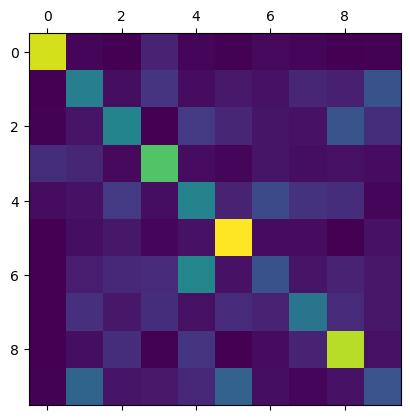

NN : 0.543


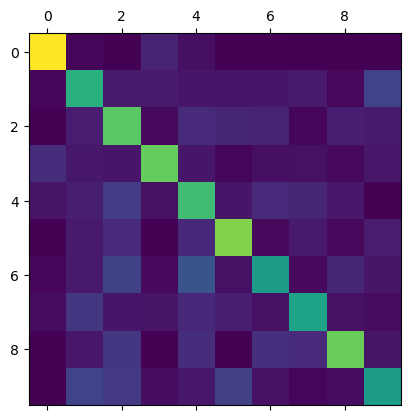

SVM : 0.5145


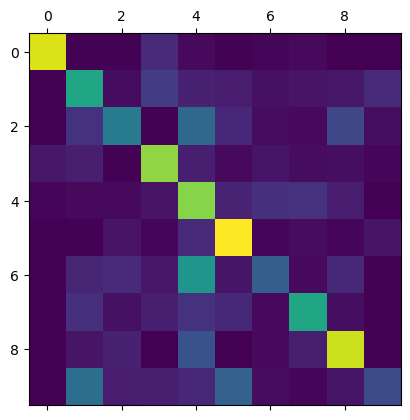

GBC : 0.665


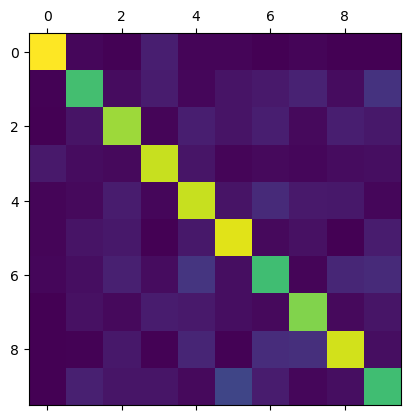

DT : 0.586


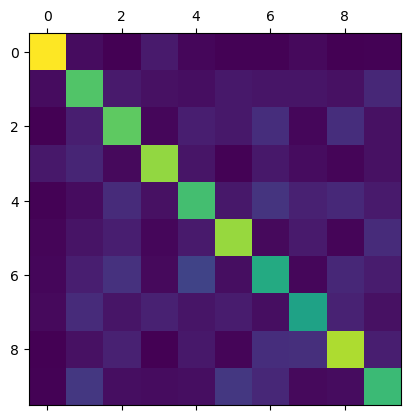

RF : 0.7125


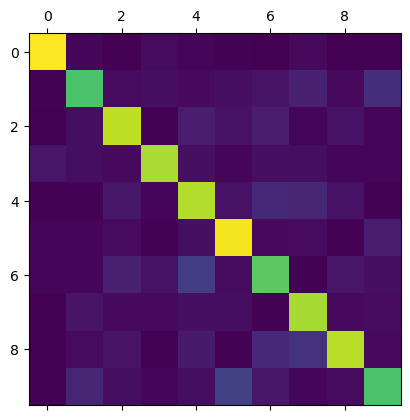

AB : 0.4325


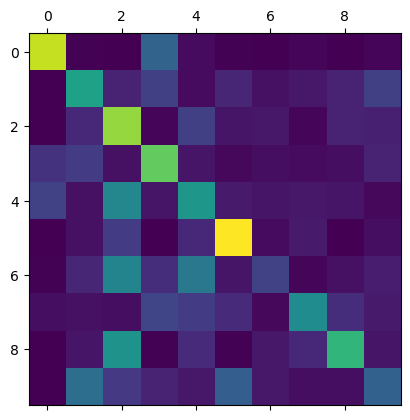

XGB : 0.7085


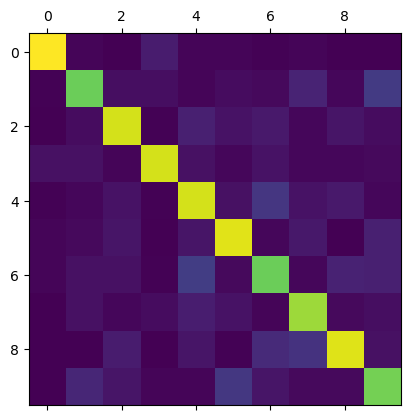

In [49]:
for name, model in dict_classifiers.items():
    final_pipeline = Pipeline(steps=[('pre', preprocessor),('model', model)])
    final_pipeline.fit(X_train, y_train)
    preds = final_pipeline.predict(X_valid)
    score = accuracy_score(y_valid, preds)
    print(name,':', score)
    conf_mat = confusion_matrix(y_valid, preds)
    plt.matshow(conf_mat)
    plt.show()